In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
LK = np.array(pd.read_csv ('../data/processed_data/LK.csv'))
y = np.array(LK[:,-1],dtype=int)
LK = LK[:,0:-1]


In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(LK,y)

In [5]:
print(LK.shape, len(pred))
acc = model.score_
print(acc)

(610, 8405) 610
0.1717557251908397


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (135.0, 651.0, 0.2073732718894009, 0.4671280276816609, 0.9866305218409217, 0.1717557251908397, 0.9968047140841564, 0.8282442748091603, 0.532871972318339)


# Mutual information maximizer (MIM)

test 0.3262144110124667 0.03177615444134096
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (183.0, 524.0, 0.34923664122137404, 0.41876430205949655, 0.9928132543339917, 0.25884016973125884, 0.9965034002367776, 0.7411598302687411, 0.5812356979405034)


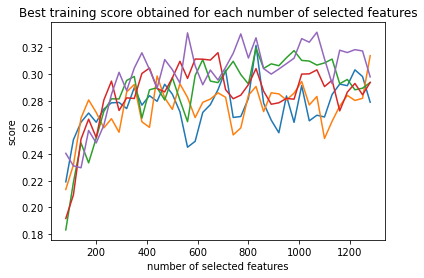

In [7]:
#Define parameters for MIM method
N = np.arange(80,1300,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 4, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))


1
test 0.3939524758378147 0.029394055764555612
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (184.0, 495.0, 0.3717171717171717, 0.4339622641509434, 0.9932847665947662, 0.2709867452135493, 0.9967328269215062, 0.7290132547864506, 0.5660377358490566)


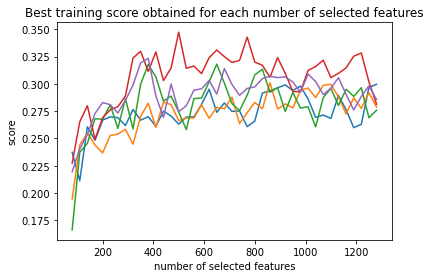

2
test 0.3758859674109795 0.05280303087208657
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (200.0, 495.0, 0.40404040404040403, 0.45146726862302483, 0.9930625630676084, 0.28776978417266186, 0.9965822784810127, 0.7122302158273381, 0.5485327313769752)


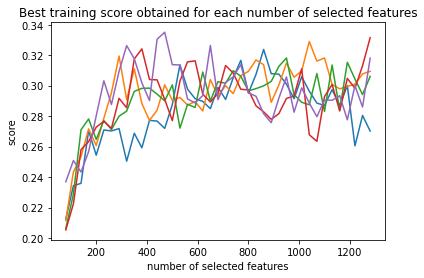

3
test 0.3901225779986828 0.054652354572048846
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (181.0, 487.0, 0.37166324435318276, 0.44362745098039214, 0.9929872561019512, 0.27095808383233533, 0.9967189419671895, 0.7290419161676647, 0.5563725490196079)


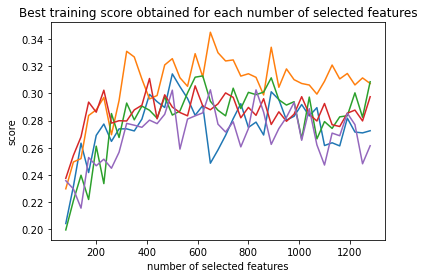

4
test 0.3773471530588701 0.04683777179803805
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (192.0, 469.0, 0.4093816631130064, 0.42761692650334077, 0.9940018672225703, 0.29046898638426627, 0.9967042408853666, 0.7095310136157338, 0.5723830734966593)


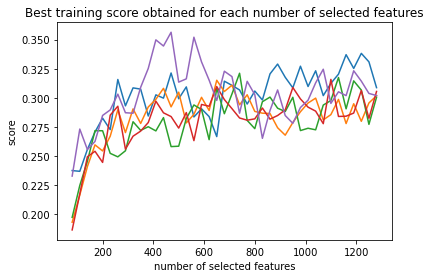

5
test 0.3514448429968011 0.06543196332762041
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (180.0, 514.0, 0.35019455252918286, 0.4466501240694789, 0.9923002022320425, 0.25936599423631124, 0.9966448001925855, 0.7406340057636888, 0.5533498759305211)


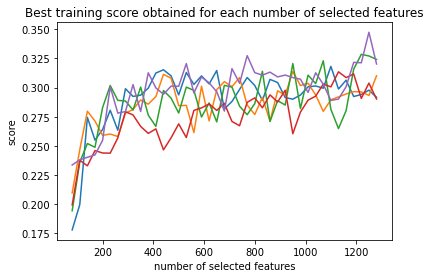

6
test 0.38085084972565875 0.02506670084255766
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (210.0, 495.0, 0.42424242424242425, 0.4656319290465632, 0.992938155360582, 0.2978723404255319, 0.9965493048495869, 0.7021276595744681, 0.5343680709534369)


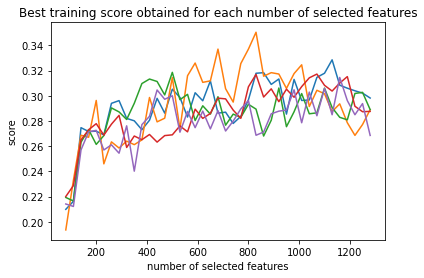

7
test 0.38217163970124324 0.05323189550410847
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (191.0, 488.0, 0.39139344262295084, 0.4340909090909091, 0.9934500161065177, 0.2812960235640648, 0.9966471419915168, 0.7187039764359352, 0.5659090909090909)


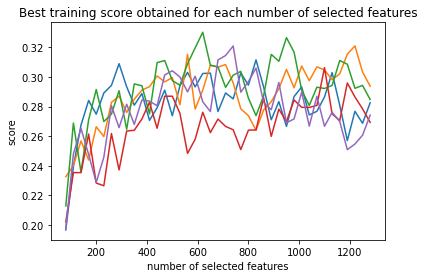

8
test 0.40046893048394894 0.06994931395276038
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (212.0, 486.0, 0.43621399176954734, 0.48623853211009177, 0.9927626876340243, 0.3037249283667622, 0.9966512184182987, 0.6962750716332379, 0.5137614678899083)


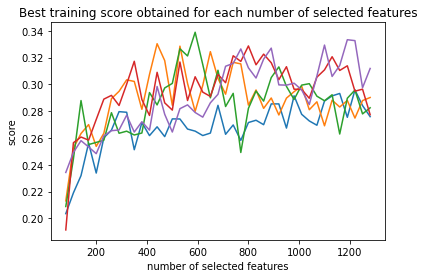

9
test 0.36428123664316275 0.023837147415946794
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (175.0, 490.0, 0.35714285714285715, 0.37393162393162394, 0.9941022832589098, 0.2631578947368421, 0.9964650242501749, 0.7368421052631579, 0.6260683760683761)


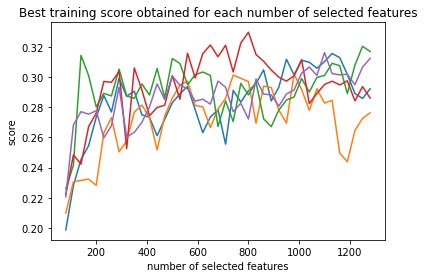

10
test 0.3883282430019885 0.028461126832040273
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (187.0, 505.0, 0.3702970297029703, 0.4495192307692308, 0.992740184873708, 0.2702312138728324, 0.9966948112867143, 0.7297687861271677, 0.5504807692307693)


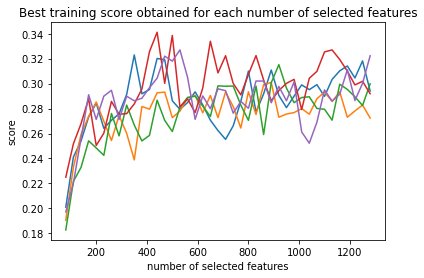

11
test 0.3602554766822156 0.04586799073305091
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (178.0, 523.0, 0.3403441682600382, 0.45758354755784064, 0.9924319161867277, 0.25392296718972895, 0.9969328720527953, 0.746077032810271, 0.5424164524421594)


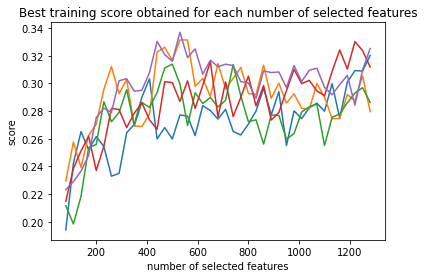

12
test 0.3935878642276392 0.06931626865691604
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (191.0, 512.0, 0.373046875, 0.45584725536992843, 0.9927676465187236, 0.2716927453769559, 0.9967663702506063, 0.7283072546230441, 0.5441527446300716)


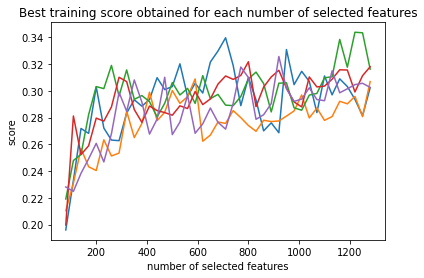

In [8]:
neighbors =  np.arange(1,13,1)
score_plot = []

for p in neighbors:
    print(p)
    #Define parameters for MIM method
    N = np.arange(80,1300,30)
    kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

    subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

    mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
    print('test', mean_score_test, std_score_test)

    #Predict and evaluate on whole data  set
    model = FamiliesClusters(np.unique(y),compute_precision,True)
    x_subset = LK[:, subset]
    pred = model.fit_predict(x_subset,y)

    print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))
    plt.show()

# Anova F test

test 0.38001348685292 0.05363902610590172
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (163.0, 523.0, 0.31166347992351817, 0.41265822784810124, 0.9925621480175209, 0.23760932944606414, 0.9966868975365941, 0.7623906705539358, 0.5873417721518988)


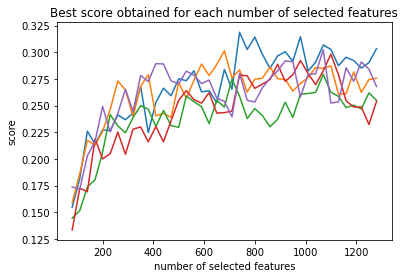

In [9]:
#Define parameters for ANOVA method
N = np.arange(80,1300,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

# Hybrid methods

# Mutual information and stimulated annealing

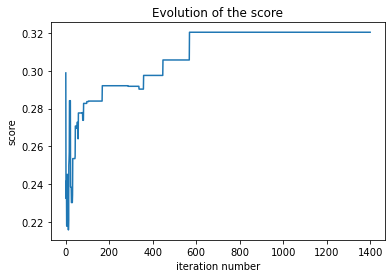

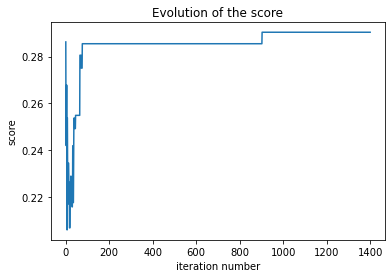

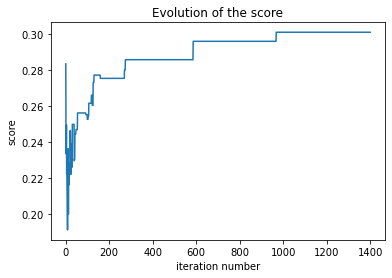

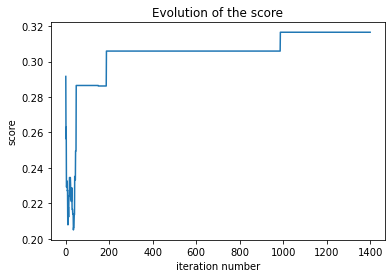

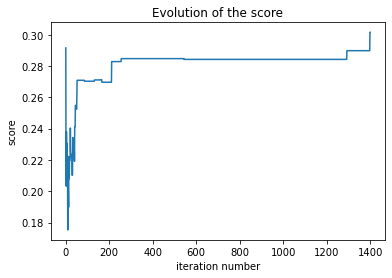

test 0.36187983242027755 0.05198945548325472
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (170.0, 575.0, 0.2956521739130435, 0.4956268221574344, 0.9896383327626908, 0.22818791946308725, 0.9968597411555427, 0.7718120805369127, 0.5043731778425656)


In [10]:
#Define parameters for MI + stimulated annealing method
N = np.array([700])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.11, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

0.01


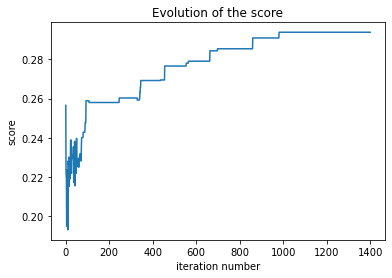

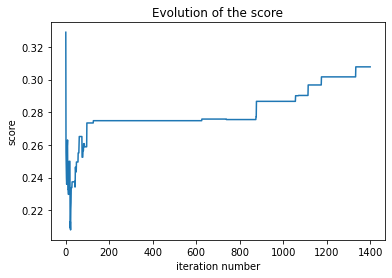

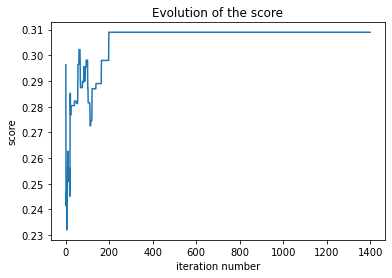

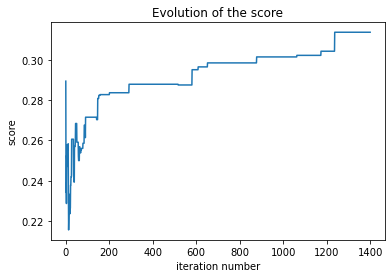

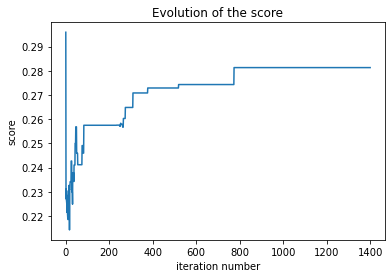

test 0.3258895192028819 0.07379675387002362
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (156.0, 578.0, 0.2698961937716263, 0.3939393939393939, 0.9914509687915989, 0.2125340599455041, 0.9964323938637174, 0.7874659400544959, 0.6060606060606061)
0.060000000000000005


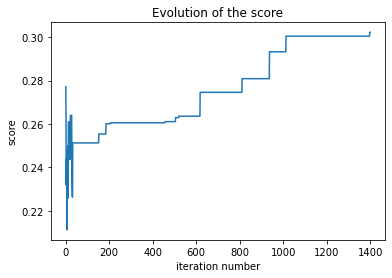

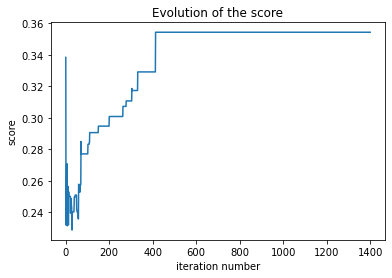

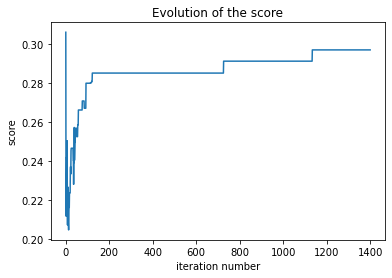

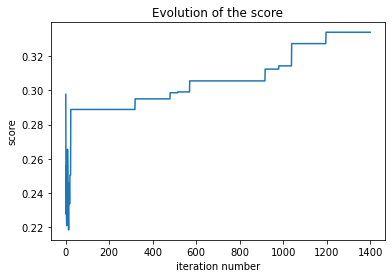

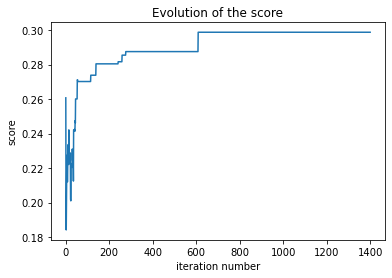

test 0.36237089371623277 0.047702682313982905
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (164.0, 596.0, 0.2751677852348993, 0.5030674846625767, 0.9891604830496145, 0.21578947368421053, 0.9970302474793767, 0.7842105263157895, 0.49693251533742333)
0.11


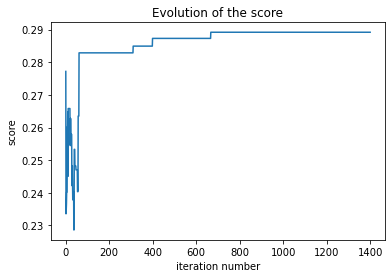

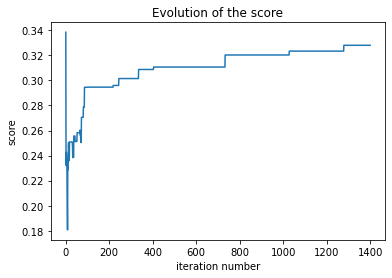

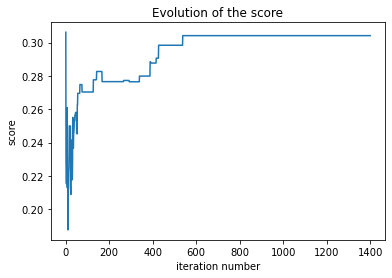

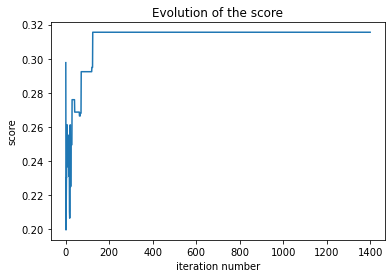

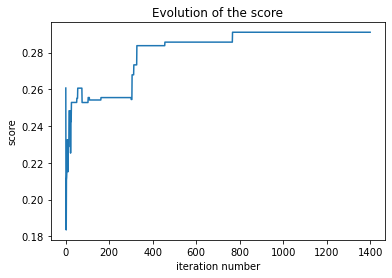

test 0.3465230842917698 0.05840273314479167
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (168.0, 562.0, 0.298932384341637, 0.47058823529411764, 0.9907573390346188, 0.23013698630136986, 0.9968725178713265, 0.7698630136986301, 0.5294117647058824)
0.16000000000000003


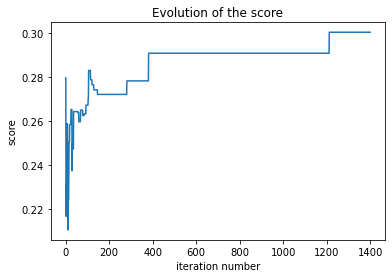

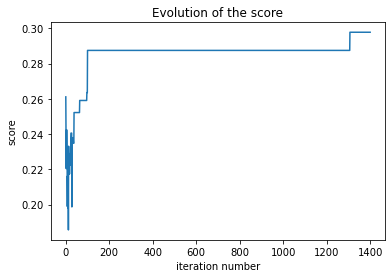

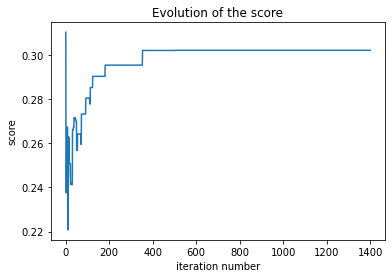

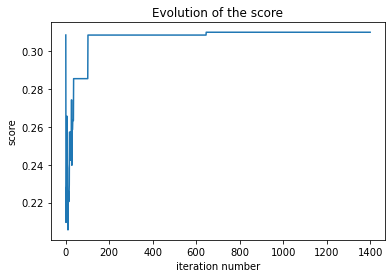

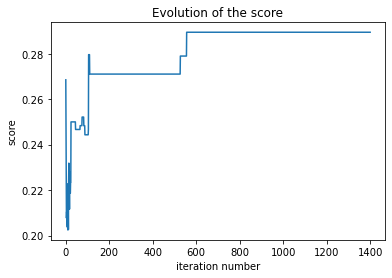

test 0.38604682295602005 0.05661341034306215
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (172.0, 524.0, 0.3282442748091603, 0.5058823529411764, 0.9910718849568076, 0.2471264367816092, 0.9971200822833634, 0.7528735632183908, 0.49411764705882355)
0.21000000000000002


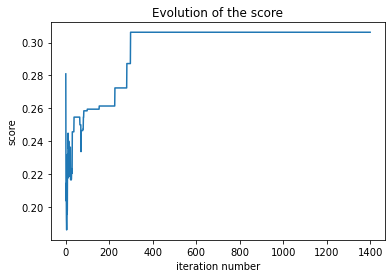

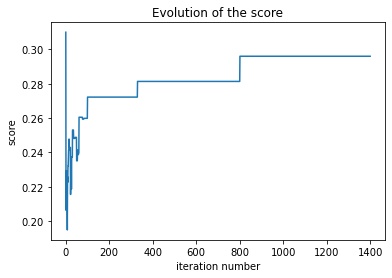

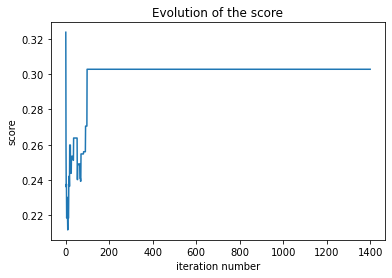

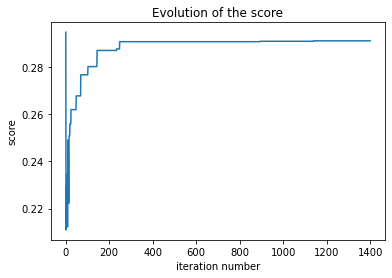

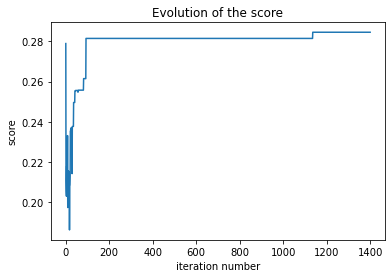

test 0.35709135532391345 0.045078661746047737
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (162.0, 550.0, 0.29454545454545455, 0.453781512605042, 0.9908391352143643, 0.22752808988764045, 0.9967327379655848, 0.7724719101123596, 0.5462184873949579)
0.26


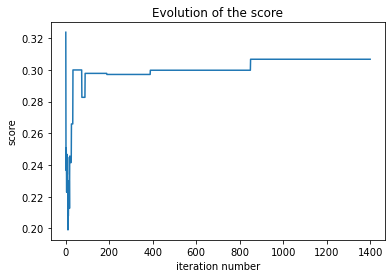

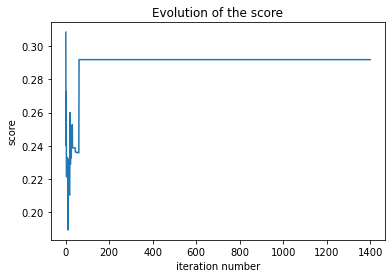

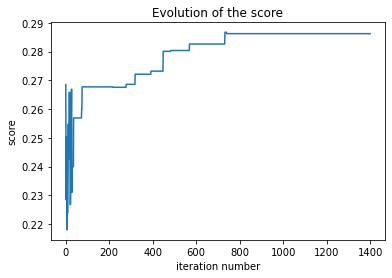

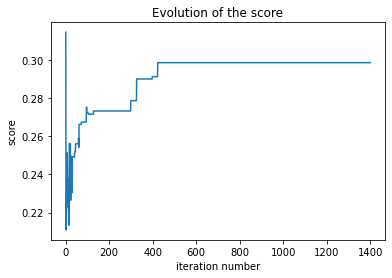

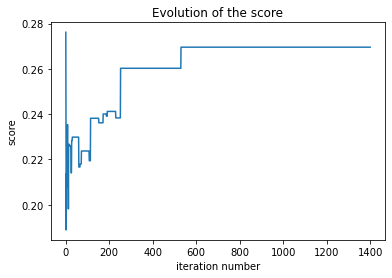

test 0.3507667103208486 0.04500384091605441
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (167.0, 562.0, 0.297153024911032, 0.47988505747126436, 0.9897269038131101, 0.22908093278463648, 0.9966682006442706, 0.7709190672153635, 0.5201149425287356)
0.31000000000000005


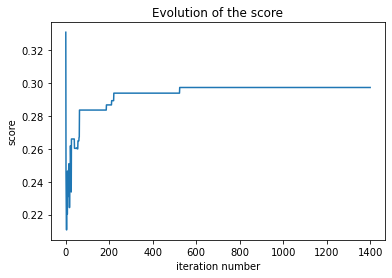

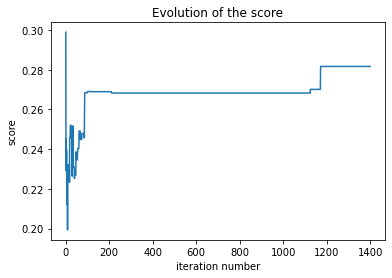

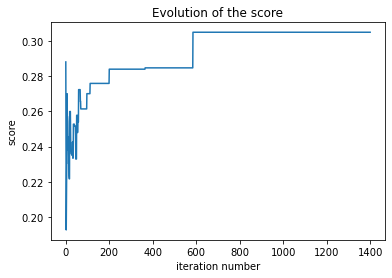

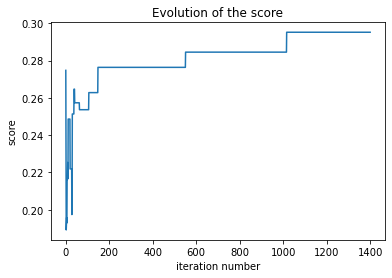

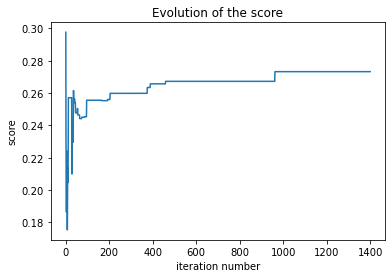

test 0.36052822318164746 0.04283202481459881
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (175.0, 572.0, 0.30594405594405594, 0.49575070821529743, 0.9898601336618744, 0.23427041499330656, 0.9968223932020637, 0.7657295850066934, 0.5042492917847026)
0.36000000000000004


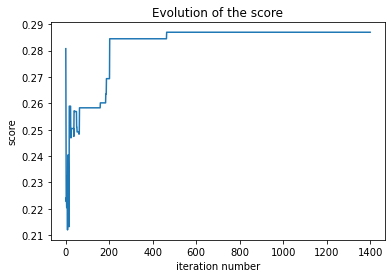

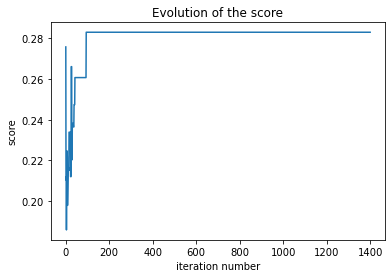

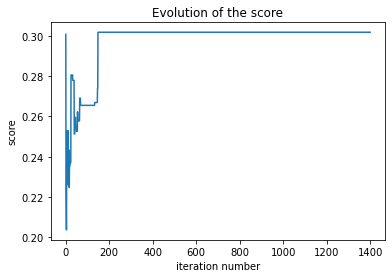

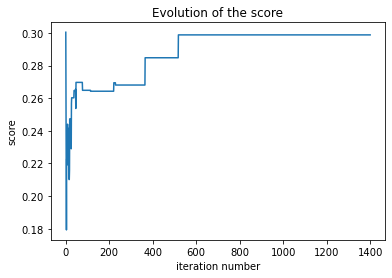

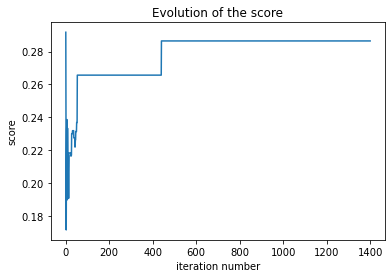

test 0.3321281154332388 0.06877661316071873
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (173.0, 555.0, 0.3117117117117117, 0.49712643678160917, 0.990348329652366, 0.23763736263736263, 0.9969364354113054, 0.7623626373626373, 0.5028735632183908)
0.41000000000000003


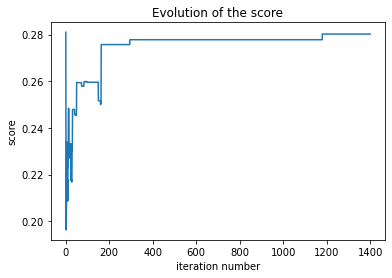

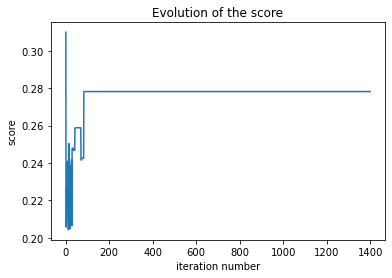

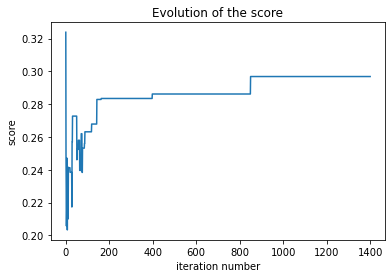

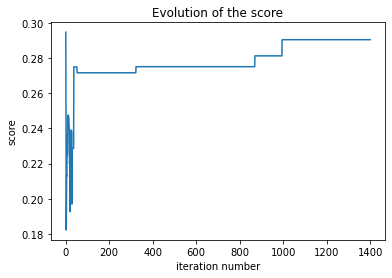

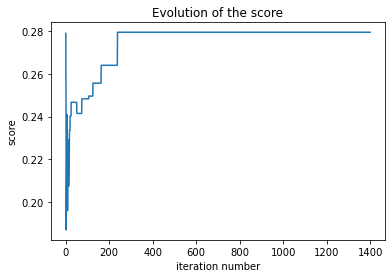

test 0.357950184735899 0.024179873926946278
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (180.0, 563.0, 0.3197158081705151, 0.4787234042553192, 0.99032961747883, 0.24226110363391656, 0.9966120445274148, 0.7577388963660835, 0.5212765957446809)
0.46


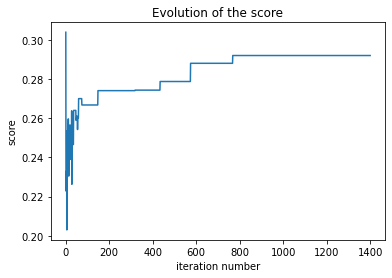

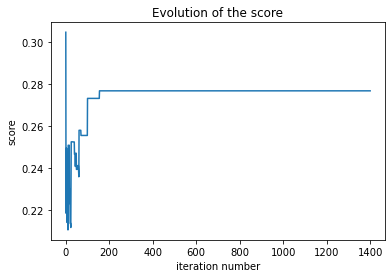

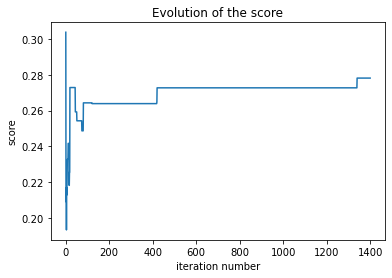

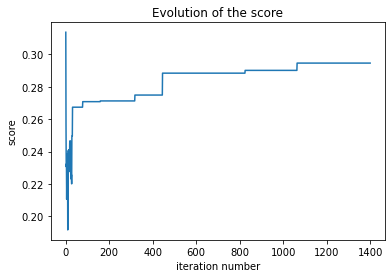

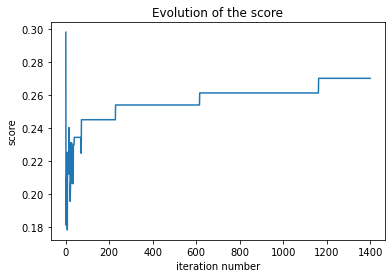

test 0.3396205084280198 0.07214526084337722
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (163.0, 602.0, 0.2707641196013289, 0.5015384615384615, 0.9890773836523632, 0.2130718954248366, 0.997037037037037, 0.7869281045751634, 0.49846153846153846)


In [11]:
prob =  np.arange(0.01,0.47,0.05)

for p in prob:
    print(p)
    #Define parameters for MI + stimulated annealing method
    N = np.array([700])
    kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': p, 'c': 1, 'plot': True} 

    subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

    mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
    print('test', mean_score_test, std_score_test)

    #Predict and evaluate on whole data  set
    model = FamiliesClusters(np.unique(y),compute_precision,True)
    x_subset = LK[:, subset]
    pred = model.fit_predict(x_subset,y)

    print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Mutual information and genetic feature selection

In [ ]:
#Define parameters for MI + genetic algorithm method
N = np.array([700])                            
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'n_population': 300, 'crossover_proba': 0.5, 'mutation_proba': 0.2, 'n_generations': 120, 'tournament_size': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MI_genetic_fs, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Create csv file with best subset gene

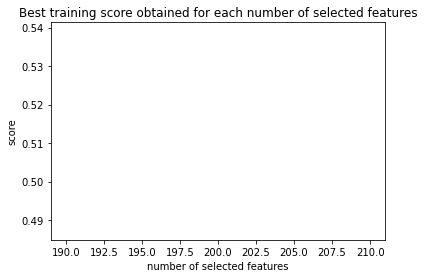

In [9]:
N = np.array([200])
best_subset, best_score = MIM(y, LK, FamiliesClusters, compute_sensitivity,True,N, 4, plot=True)

In [10]:
#Create .csv with names of this subset
get_best_genes_names(best_subset, '../data/processed_data/LKgenes_interest.csv', '../data/optimized_subsets/LKgenes_best.csv')